In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy import stats
import seaborn as sns
import mantel
from matplotlib.pyplot import figure
from matplotlib import rcParams

### Load in the outputs from the linear models that regressed the memory performance from the alignment matrices in the behavioral study

In [3]:
pval_dict_diff = np.load('../../data/fig_3_5_behavioral_event_boundaries/_linear_models_behav/diff_movie_linear_outputs.npy',allow_pickle=True).item()

pval_dict_corr = np.load('../../data/fig_3_5_behavioral_event_boundaries/_linear_models_behav/corr_mantel_movie_linear_outputs.npy',allow_pickle=True).item()


### Load in a df with the bottom triangle of each alignment matrix per movie (to plot)

In [4]:
df = pd.read_csv('../../data/fig_3_5_behavioral_event_boundaries/behavioral_match_z/df_bottom_tri.csv')


### Load in the functions that are used below; i.e. the coloring functions and the plotting of difference, correlation, and original matrices

In [5]:

from diff_corr_behav_events_helper_functions import get_color, corr_scatter_label, pval_star, dist_plots, mat_plots,Rd_Bu_mod

#note the plotting of the reg plot is just called locally below 


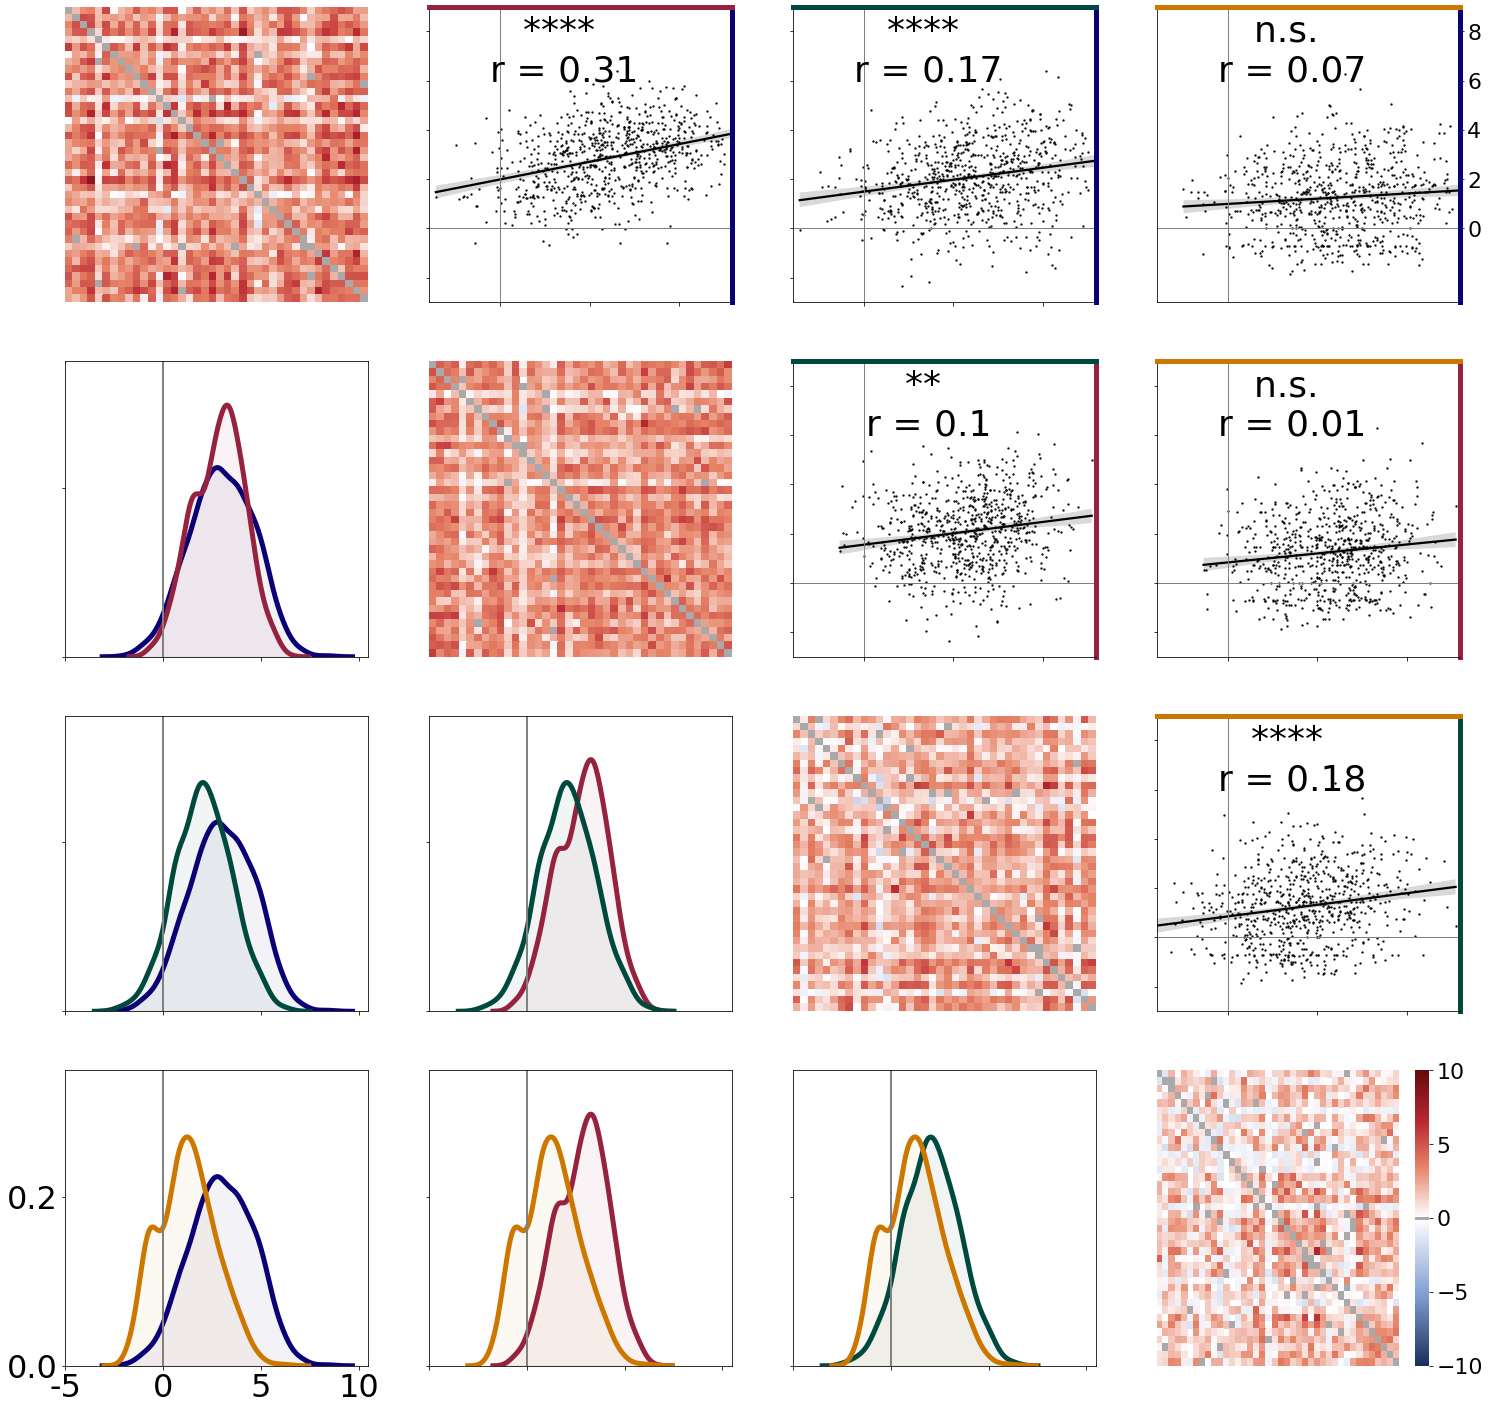

In [7]:

rcParams.update({'font.size': 22})


fig, axs = plt.subplots(4, 4,figsize=(25,25))
fig.set_facecolor("white")

movies = ['iteration','defeat','growth','lemonade']

av = 0
for mov in movies:
    mat_plots(df[mov],ax=axs[av,av],num=av)
    av = av+1

ay = 1

for mov in movies[1:]:
    g2 = sns.regplot(df['iteration'],df[mov],scatter_kws={'s':2},ax=axs[0,ay],color='black')
    p,r = corr_scatter_label('iteration',mov, pval_dict_corr)
    p = pval_star(p)
    g2.text(1.8,6,f'{p} \nr = {np.round(r,2)}',fontsize=36,ha='center')
    g2.spines['right'].set_color(get_color('iteration'))
    g2.spines['top'].set_color(get_color(mov))
    g2.spines['top'].set_linewidth(5)
    g2.spines['right'].set_linewidth(5)
    g2.set_ylim(-3,9)
    g2.set_xlim(-2,6.5)
    g2.axvline(x=0,color='grey',linewidth=1)
    g2.axhline(y=0,color='grey',linewidth=1)
    
    if ay < 3:
        g2.set(xticklabels=[]) 
        g2.set(yticklabels=[]) 
        g2.set(xlabel=None)
        g2.set(ylabel=None)
        ay = ay + 1
    else:

        g2.set_yticks(np.arange(0, 8.5, 2))
        g2.set_xticks([])
        g2.set(xlabel=None)
        g2.set(ylabel=None)
        g2.yaxis.set_label_position("right")
        g2.yaxis.tick_right()

ay = 2
for mov in movies[2:]:
    g2 = sns.regplot(df['defeat'],df[mov],scatter_kws={'s':2},ax=axs[1,ay],color='black')
    g2.set_ylim(-3,9)
    g2.set_xlim(-2,6.5)
    g2.spines['right'].set_color(get_color('defeat'))
    g2.spines['top'].set_color(get_color(mov))
    g2.spines['top'].set_linewidth(5)
    g2.spines['right'].set_linewidth(5)
    p,r = corr_scatter_label('defeat',mov, pval_dict_corr)
    p = pval_star(p)
    g2.text(1.8,6,f'{p} \nr = {np.round(r,2)}',fontsize=36,ha='center')
    ay = ay + 1
    g2.set(xticklabels=[])  
    g2.set(yticklabels=[]) 
    g2.set(xlabel=None)
    g2.set(ylabel=None)
    g2.axvline(x=0,color='grey',linewidth=1)
    g2.axhline(y=0,color='grey',linewidth=1)


ay = 3
for mov in movies[3:]:
    g2 = sns.regplot(df['growth'],df[mov],scatter_kws={'s':2},ax=axs[2,ay],color='black')
    g2.set_ylim(-3,9)
    g2.set_xlim(-2,6.5)
    g2.spines['right'].set_color(get_color('growth'))
    g2.spines['top'].set_color(get_color(mov))
    g2.spines['top'].set_linewidth(5)
    g2.spines['right'].set_linewidth(5)
    p,r = corr_scatter_label('growth',mov, pval_dict_corr)
    p = pval_star(p)
    g2.text(1.8,6,f'{p} \nr = {np.round(r,2)}',fontsize=36,ha='center')
    ay = ay + 1
    g2.set(xticklabels=[]) 
    g2.set(yticklabels=[]) 
    g2.set(xlabel=None)
    g2.set(ylabel=None)
    g2.axvline(x=0,color='grey',linewidth=1)
    g2.axhline(y=0,color='grey',linewidth=1)


ay = 1
c = 0
for mov in movies[1:]:
    dist_plots(df['iteration'],df[mov],num = 0, c=c, pval_dict_diff = pval_dict_diff, scatter_kws={'s':2},ax=axs[ay,0])
    ay = ay + 1
    c = c +1


ay = 2
c = 1
for mov in movies[2:]:
    dist_plots(df['defeat'],df[mov],num = ay, c=c, pval_dict_diff = pval_dict_diff, scatter_kws={'s':2},ax=axs[ay,1])
    ay = ay + 1
    c = c +1


ay = 3
c = 2
for mov in movies[3:]:
    dist_plots(df['growth'],df[mov],num = ay, c=c, pval_dict_diff = pval_dict_diff, scatter_kws={'s':2},ax=axs[ay,2])
    ay = ay + 1

